## Will Paz

In [1]:
import numpy as np
import pandas as pd
from numpy.linalg import svd
import matplotlib.pyplot as plt
import mth433 as mth

In [2]:
rawdf = pd.read_csv('fangraphs_pitching_2016.csv')
columns = ['Name','O-Swing%','Z-Swing%','O-Contact%','Z-Contact%']
rawdf = rawdf.loc[:,columns]

In [3]:
rawdf # Raw dataframe

,Name,O-Swing%,Z-Swing%,O-Contact%,Z-Contact%
0,Jose Fernandez,0.323,0.626,0.486,0.818
1,Noah Syndergaard,0.365,0.669,0.538,0.834
2,Max Scherzer,0.347,0.694,0.537,0.790
3,Justin Verlander,0.343,0.696,0.647,0.828
4,Chris Sale,0.333,0.663,0.654,0.832
...,...,...,...,...,...
69,Brandon Finnegan,0.283,0.668,0.655,0.860
70,Jimmy Nelson,0.261,0.642,0.711,0.885
71,Francisco Liriano,0.300,0.619,0.527,0.886
72,Jered Weaver,0.289,0.629,0.775,0.843


In [4]:
normdf = rawdf.copy()

In [5]:
A = np.array(normdf.iloc[:,1:]) 
A = (A - np.mean(A,axis=0)) 
normdf.iloc[:,1:] = A 

In [6]:
normdf # Normalized dataframe

,Name,O-Swing%,Z-Swing%,O-Contact%,Z-Contact%
0,Jose Fernandez,0.015973,-0.033959,-0.159946,-0.050311
1,Noah Syndergaard,0.057973,0.009041,-0.107946,-0.034311
2,Max Scherzer,0.039973,0.034041,-0.108946,-0.078311
3,Justin Verlander,0.035973,0.036041,0.001054,-0.040311
4,Chris Sale,0.025973,0.003041,0.008054,-0.036311
...,...,...,...,...,...
69,Brandon Finnegan,-0.024027,0.008041,0.009054,-0.008311
70,Jimmy Nelson,-0.046027,-0.017959,0.065054,0.016689
71,Francisco Liriano,-0.007027,-0.040959,-0.118946,0.017689
72,Jered Weaver,-0.018027,-0.030959,0.129054,-0.025311


In [7]:
U,S,V = svd(A, full_matrices=False) # SVD decomp

In [8]:
S

array([0.54087553, 0.27185454, 0.21278335, 0.16238987])

In [9]:
S[0]**2/sum(S**2) # The percent of the variance accountable by PC1

0.6677639170616265

In [10]:
(S[0]**2 + S[1]**2)/sum(S**2) # The percent of the variance accountable by PC1 and PC2

0.8364586270353371

In [11]:
V # Row 0 is PC1, columns are correspondent to O-Swing%,...

array([[ 0.1364958 ,  0.06732531, -0.96614363, -0.20833311],
       [ 0.17882364,  0.67113033,  0.21975456, -0.68506505],
       [-0.89888815, -0.15794578, -0.05054275, -0.40558434],
       [-0.37602007,  0.72118272, -0.12537882,  0.56814131]])

#### Regarding the first principle component, we can see that players who have a low O-Contact%, relative to moderate levels of O-Swing% and Z-Swing%, or vice versa will be accountable for approximately 66.8% of the variance. Using a basline of being a value of .25 in either direction of the origin as the bounds to be not an outlier, we were able to label the outliers in the figure below. Out of the outlined 3 outliers, the most extreme examples in either direction of the first principle component are Jose Fernandez and Bartolo Colon. Before his unfortunate death in 2016, Fernandez put together a phenomal season where he was named an all star and placed top 10 in Cy Young voting. It may be attributed to the qualitative nature of our study where his success stems from having such a low O-Contact% meaning he was unhittable on a batter's swing outside of the zone. In his age 43 season, Colon did the opposite of Fernandez and was hit around more than anyone else on pitches outside of the zone.

#### Regarding the second principle component, as the Z-Swing% of a player is high and the Z-Contact% is low or vice versa, this compiled with the first principle component  will be accountable for approximately 83.6% of the variance. Similarly to the first principle component analysis, the outliers were defined by the distance from the origin being either .23 away from the origin in either the horizontal or vertical directions. The specific outliers to consider here are David Price and Doug Fister. In his prime, Price threw a ton a great games in his career and enough to earn him a Cy Young award. In 2016, it's no suprise that Price one of the best at getting swings and misses in the zone, hence having both a high Z-Swing% and a low Z-Contact%, which contexually would yield fruitful results. On the other hand, a journeyman in struggled in 2016 where he exhibited a very low Z-Swing% compared to everyone else, contextually leading us to believe that he struggled to throw strikes for batters to swing at.

In [12]:
PCdf = normdf.copy()

In [13]:
PCdf.iloc[:,1:] = U
PCcols = {'O-Swing%':'PC1','Z-Swing%':'PC2','O-Contact%':'PC3','Z-Contact%':'PC4'}
PCdf = PCdf.rename(columns=PCcols)

In [14]:
C = np.array(PCdf.iloc[:,1:]) 

In [15]:
PCdf # PC1 column is how a player compares to other players in uncorrelated fashion to other players regarding PC1

,Name,PC1,PC2,PC3,PC4
0,Jose Fernandez,0.304887,-0.075840,0.091620,-0.240329
1,Noah Syndergaard,0.221791,0.059656,-0.160573,-0.130786
2,Max Scherzer,0.239094,0.219604,-0.018985,-0.131248
3,Justin Verlander,0.027208,0.215070,-0.102132,-0.065085
4,Chris Sale,0.006533,0.122604,-0.044679,-0.179895
...,...,...,...,...,...
69,Brandon Finnegan,-0.018034,0.032307,0.109223,0.055277
70,Jimmy Nelson,-0.136483,-0.064082,0.160505,0.034980
71,Francisco Liriano,0.198783,-0.246466,0.054625,-0.011908
72,Jered Weaver,-0.229178,0.079816,0.116725,-0.283944


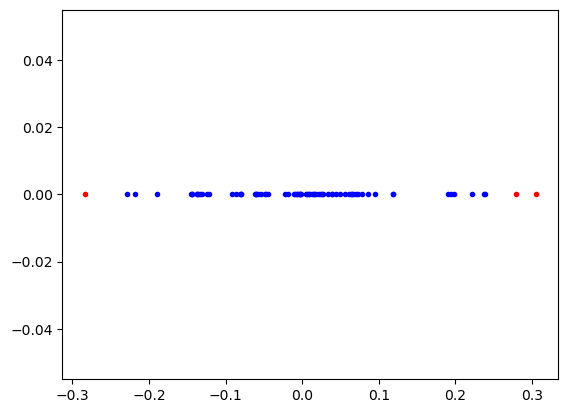

In [16]:
m,n = PCdf.shape

for i in range(m):
    if PCdf['PC1'][i] > 0.25 or PCdf['PC1'][i] < -0.25:
        plt.plot(PCdf['PC1'][i], 0, 'r.')
    else:
        plt.plot(PCdf['PC1'][i], 0,'b.')
        
# 1-D Plot of the PC1

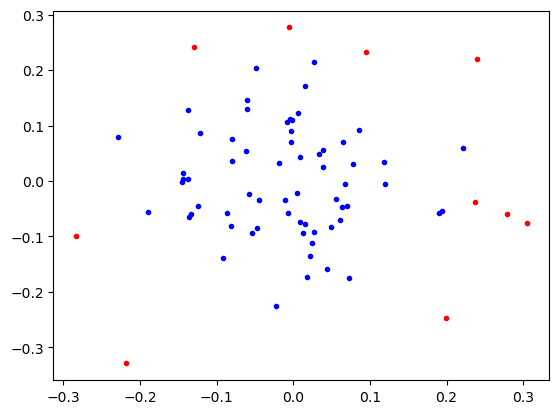

In [17]:
m,n = PCdf.shape

for i in range(m):
    if PCdf['PC1'][i] > 0.23 or PCdf['PC1'][i] < -0.23:
        plt.plot(PCdf['PC1'][i], PCdf['PC2'][i], 'r.')
    elif PCdf['PC2'][i] > 0.23 or PCdf['PC2'][i] < -0.23:
        plt.plot(PCdf['PC1'][i], PCdf['PC2'][i], 'r.')
    else:
        plt.plot(PCdf['PC1'][i], PCdf['PC2'][i], 'b.')
        
# 2-D Plot of the PC1 (x-axis) and PC2 (y-axis)

In [18]:
PCMat_df = mth.dist_mat(PCdf)

In [19]:
PCMat_df # A blank df before we insert the comparisons

,Jose Fernandez,Noah Syndergaard,Max Scherzer,Justin Verlander,Chris Sale,Rick Porcello,Johnny Cueto,Corey Kluber,Jose Quintana,Masahiro Tanaka,...,Tom Koehler,Josh Tomlin,Hector Santiago,Doug Fister,R.A. Dickey,Brandon Finnegan,Jimmy Nelson,Francisco Liriano,Jered Weaver,James Shields
Jose Fernandez,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Noah Syndergaard,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Max Scherzer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Justin Verlander,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Chris Sale,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Brandon Finnegan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Jimmy Nelson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Francisco Liriano,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Jered Weaver,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
def dist_calc(A):
    """
    Calculates the Euclidean squared distance between the rows of A
    Input: An mxn matrix
    Returns: A mxm matrix B where B[i,j] = the Euclidean distance between A[ i , : ] and A[ j , : ]
    """
    m,n = A.shape
    Z = np.zeros([m,m])
    for i in range(m):
        for j in range(m):
            Z[i, j] = np.sum((A[i, :] - A[j, :]) ** 2)
    return Z

In [21]:
B = dist_calc(C)

In [22]:
PCMat_df.iloc[:,0:] = B

In [23]:
comp_df = mth.comp_df(PCdf)

In [24]:
names = PCMat_df.index.values

for i,name in enumerate(names): 
    temp_df = PCMat_df.sort_values(by=name) 
    comps = temp_df.index.values[1:5]
    
    comp_df.iloc[i,:] = comps

In [25]:
comp_df # The comparison dataframe

,Comp1,Comp2,Comp3,Comp4
Name,,,,
Jose Fernandez,Chris Archer,Kenta Maeda,Drew Pomeranz,Robbie Ray
Noah Syndergaard,Cole Hamels,Corey Kluber,Michael Pineda,Max Scherzer
Max Scherzer,Danny Duffy,Noah Syndergaard,Justin Verlander,Madison Bumgarner
Justin Verlander,David Price,Jeremy Hellickson,Cole Hamels,Danny Duffy
Chris Sale,Madison Bumgarner,Kenta Maeda,Jeremy Hellickson,Justin Verlander
...,...,...,...,...
Brandon Finnegan,Mike Fiers,Drew Smyly,Dan Straily,Matt Moore
Jimmy Nelson,Aaron Sanchez,Mike Fiers,Kendall Graveman,Jose Quintana
Francisco Liriano,Jaime Garcia,Chris Archer,Yordano Ventura,Dallas Keuchel


In [26]:
print(comp_df.to_string())

                               Comp1              Comp2              Comp3              Comp4
Name                                                                                         
Jose Fernandez          Chris Archer        Kenta Maeda      Drew Pomeranz         Robbie Ray
Noah Syndergaard         Cole Hamels       Corey Kluber     Michael Pineda       Max Scherzer
Max Scherzer             Danny Duffy   Noah Syndergaard   Justin Verlander  Madison Bumgarner
Justin Verlander         David Price  Jeremy Hellickson        Cole Hamels        Danny Duffy
Chris Sale         Madison Bumgarner        Kenta Maeda  Jeremy Hellickson   Justin Verlander
Rick Porcello             Wade Miley       Johnny Cueto       Martin Perez        CC Sabathia
Johnny Cueto       Jeremy Hellickson    Jeff Samardzija      Rick Porcello      Kevin Gausman
Corey Kluber          Michael Pineda        John Lackey      Collin McHugh   Noah Syndergaard
Jose Quintana            Chad Bettis         Mike Fiers    E

## R.I.P. Jose Fernandez